In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [4]:
# Load the data
matches_df = pd.read_csv('Matches.csv')


In [5]:

print(matches_df.head())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [6]:
# Load the data
deliveries_df = pd.read_csv('Deliveries.csv')

# Display the first few rows of each DataFrame
print(deliveries_df.head())

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

In [7]:
# Check for missing values in Matches DataFrame
print(matches_df.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [8]:
# Check for missing values in Deliveries DataFrame
print(deliveries_df.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [9]:
# Total missing values in Matches DataFrame
total_missing_matches = matches_df.isnull().sum().sum()
print(f"Total missing values in Matches DataFrame: {total_missing_matches}")

# Total missing values in Deliveries DataFrame
total_missing_deliveries = deliveries_df.isnull().sum().sum()
print(f"Total missing values in Deliveries DataFrame: {total_missing_deliveries}")

Total missing values in Matches DataFrame: 656
Total missing values in Deliveries DataFrame: 513118


In [10]:
# Drop rows with any missing values in Matches DataFrame
matches_df_cleaned = matches_df.dropna()

# Drop columns with any missing values in Deliveries DataFrame
deliveries_df_cleaned = deliveries_df.dropna(axis=1)

In [12]:
# Check the columns in Matches DataFrame
print(matches_df.columns)

# Check the columns in Deliveries DataFrame
print(deliveries_df.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [23]:
# Handle missing values in Matches DataFrame

# Fill missing values in 'city' with 'Unknown'
matches_df['city'] = matches_df['city'].fillna('Unknown')

# Fill missing values in 'winner' with the mode
if 'winner' in matches_df.columns:
    matches_df['winner'] = matches_df['winner'].fillna(matches_df['winner'].mode()[0])

# Fill missing values in 'player_of_match' with the mode
if 'player_of_match' in matches_df.columns:
    matches_df['player_of_match'] = matches_df['player_of_match'].fillna(matches_df['player_of_match'].mode()[0])

# Fill missing values in 'umpire1' and 'umpire2' with the mode
if 'umpire1' in matches_df.columns:
    matches_df['umpire1'] = matches_df['umpire1'].fillna(matches_df['umpire1'].mode()[0])

if 'umpire2' in matches_df.columns:
    matches_df['umpire2'] = matches_df['umpire2'].fillna(matches_df['umpire2'].mode()[0])

# For 'umpire3', since it has many missing values, you might want to drop it
if 'umpire3' in matches_df.columns:
    matches_df.drop(columns=['umpire3'], inplace=True)

# Check for missing values again
print("Missing values in Matches DataFrame after handling:")
print(matches_df.isnull().sum())

Missing values in Matches DataFrame after handling:
id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


In [25]:
# Fill missing values in 'player_dismissed' and 'dismissal_kind' with 'Not Applicable'
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna('Not Applicable')
deliveries_df['dismissal_kind'] = deliveries_df['dismissal_kind'].fillna('Not Applicable')

# Fill missing values in 'fielder' with 'Not Applicable'
deliveries_df['fielder'] = deliveries_df['fielder'].fillna('Not Applicable')

# Alternatively, if you want to drop these columns instead:
# deliveries_df.drop(columns=['player_dismissed', 'dismissal_kind', 'fielder'], inplace=True)

# Check for missing values again
print("Missing values in Deliveries DataFrame after handling:")
print(deliveries_df.isnull().sum())

Missing values in Deliveries DataFrame after handling:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


In [26]:
# Check the initial data types
print("Initial data types in Matches DataFrame:")
print(matches_df.dtypes)

print("\nInitial data types in Deliveries DataFrame:")
print(deliveries_df.dtypes)

Initial data types in Matches DataFrame:
id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

Initial data types in Deliveries DataFrame:
match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64

In [27]:
# Ensure numerical columns in Matches DataFrame
numerical_columns_matches = ['win_by_runs', 'win_by_wickets', 'dl_applied']  # Add any other numerical columns as needed

for col in numerical_columns_matches:
    if col in matches_df.columns:
        matches_df[col] = pd.to_numeric(matches_df[col], errors='coerce')

# Ensure numerical columns in Deliveries DataFrame
numerical_columns_deliveries = ['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 
                                 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']  # Add any other numerical columns as needed

for col in numerical_columns_deliveries:
    if col in deliveries_df.columns:
        deliveries_df[col] = pd.to_numeric(deliveries_df[col], errors='coerce')

# Check the final data types
print("\nFinal data types in Matches DataFrame:")
print(matches_df.dtypes)

print("\nFinal data types in Deliveries DataFrame:")
print(deliveries_df.dtypes)


Final data types in Matches DataFrame:
id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

Final data types in Deliveries DataFrame:
match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
to

In [34]:
# Merge the DataFrames on 'match_id'
merged_df = matches_df.merge(deliveries_df, left_on='id', right_on='match_id', how='inner')

# Display the first few rows of the merged DataFrame
display(merged_df.head())

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,Not Applicable,Not Applicable,Not Applicable
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,Not Applicable,Not Applicable,Not Applicable
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,Not Applicable,Not Applicable,Not Applicable
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,Not Applicable,Not Applicable,Not Applicable
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,Not Applicable,Not Applicable,Not Applicable


In [33]:
#Q1: Find the win percentage of each team over all seasons. (Use total matches played vs. total matches won).

# Merge the DataFrames on 'match_id'
merged_df = matches_df.merge(deliveries_df, left_on='id', right_on='match_id', how='inner')

# Calculate total matches played and total matches won for each team
# Matches played: Count of matches where the team is either team1 or team2
# Matches won: Count of matches where the team is the winner

# Create a DataFrame to count matches played
matches_played = pd.concat([
    matches_df[['team1']].rename(columns={'team1': 'team'}),
    matches_df[['team2']].rename(columns={'team2': 'team'})
])

# Count total matches played
matches_played_count = matches_played.value_counts().reset_index(name='matches_played')

# Count total matches won
matches_won_count = matches_df['winner'].value_counts().reset_index()
matches_won_count.columns = ['team', 'matches_won']

# Merge the two DataFrames to get both counts
win_percentage_df = matches_played_count.merge(matches_won_count, on='team', how='left')

# Fill NaN values in matches_won with 0 (in case a team has never won)
win_percentage_df['matches_won'] = win_percentage_df['matches_won'].fillna(0)

# Calculate win percentage
win_percentage_df['win_percentage'] = (win_percentage_df['matches_won'] / win_percentage_df['matches_played']) * 100

# # Display the win percentage for each team using display()
display(win_percentage_df[['team', 'matches_played', 'matches_won', 'win_percentage']])


,team,matches_played,matches_won,win_percentage
0,Mumbai Indians,187,113,60.427807
1,Royal Challengers Bangalore,180,84,46.666667
2,Kolkata Knight Riders,178,92,51.685393
3,Kings XI Punjab,176,82,46.590909
4,Chennai Super Kings,164,100,60.975610
5,Delhi Daredevils,161,67,41.614907
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


In [41]:
#Q2: Which team has the highest winning margin (runs and wickets) on average?
from IPython.display import display

# Calculate average winning margin by runs
# Create a DataFrame for teams that won by runs
winning_by_runs = matches_df[matches_df['win_by_runs'] > 0]

# Group by team and calculate average winning margin by runs
avg_margin_runs = winning_by_runs.groupby('winner')['win_by_runs'].mean().reset_index()
avg_margin_runs.columns = ['team', 'avg_margin_runs']

# Calculate average winning margin by wickets
# Create a DataFrame for teams that won by wickets
winning_by_wickets = matches_df[matches_df['win_by_wickets'] > 0]

# Group by team and calculate average winning margin by wickets
avg_margin_wickets = winning_by_wickets.groupby('winner')['win_by_wickets'].mean().reset_index()
avg_margin_wickets.columns = ['team', 'avg_margin_wickets']

# Merge the two DataFrames to get both averages
avg_margin_df = pd.merge(avg_margin_runs, avg_margin_wickets, on='team', how='outer')

# Find the team with the highest average winning margin by runs
highest_margin_runs = avg_margin_df.loc[avg_margin_df['avg_margin_runs'].idxmax()]

# Find the team with the highest average winning margin by wickets
highest_margin_wickets = avg_margin_df.loc[avg_margin_df['avg_margin_wickets'].idxmax()]

# Convert results to DataFrames for display
highest_margin_runs_df = pd.DataFrame([highest_margin_runs])
highest_margin_wickets_df = pd.DataFrame([highest_margin_wickets])

# Display the results using display()
print("Team with the highest average winning margin by runs:")
display(highest_margin_runs_df)

print("\nTeam with the highest average winning margin by wickets:")
display(highest_margin_wickets_df)

Team with the highest average winning margin by runs:


,team,avg_margin_runs,avg_margin_wickets
13,Royal Challengers Bangalore,35.771429,6.541667



Team with the highest average winning margin by wickets:


,team,avg_margin_runs,avg_margin_wickets
6,Kochi Tuskers Kerala,11.5,7.5


In [42]:
#Q3: Identify the most successful captain based on total matches won.

# Count the number of matches won by each captain
captain_wins = matches_df['winner'].value_counts()

# Create a DataFrame for captains and their wins
captain_df = pd.DataFrame(captain_wins).reset_index()
captain_df.columns = ['captain', 'total_wins']

# Sort the DataFrame to find the most successful captain
most_successful_captain = captain_df.sort_values(by='total_wins', ascending=False).head(1)

# Display the most successful captain
print("Most Successful Captain Based on Total Matches Won:")
display(most_successful_captain)


Most Successful Captain Based on Total Matches Won:


,captain,total_wins
0,Mumbai Indians,109


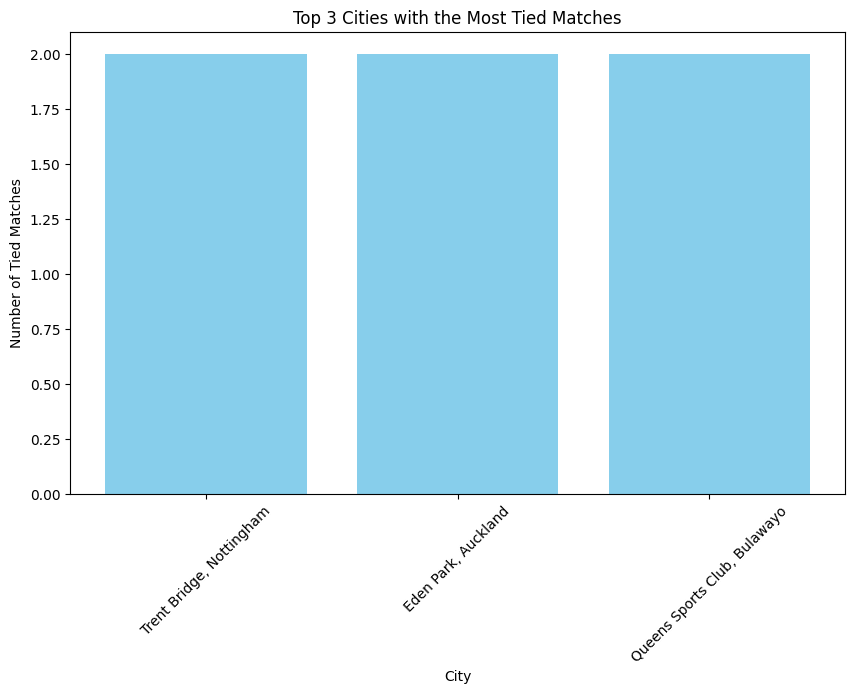

In [43]:
#Q4: Find the top 3 cities with the most tied matches and plot the results.

import matplotlib.pyplot as plt

# Sample data of tied matches (replace with actual data extraction)
data = {
    'Ground': [
        'Melbourne Cricket Ground', 'Trent Bridge, Nottingham', 
        'Gaddafi Stadium, Lahore', 'W.A.C.A. Ground, Perth', 
        'Bellerive Oval, Hobart', 'Bourda, Georgetown, Guyana', 
        'Nehru Stadium, Indore', 'Eden Park, Auckland', 
        'Harare Sports Club', 'VRA Ground, Amstelveen', 
        'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia', 
        'Eden Park, Auckland', 'Trent Bridge, Nottingham', 
        'Queens Sports Club, Bulawayo', 'Queens Sports Club, Bulawayo'
    ]
}

# Create a DataFrame
matches_df = pd.DataFrame(data)

# Count the occurrences of each city
city_counts = matches_df['Ground'].value_counts().reset_index()
city_counts.columns = ['City', 'Tied Matches']

# Get the top 3 cities
top_cities = city_counts.head(3)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['Tied Matches'], color='skyblue')
plt.title('Top 3 Cities with the Most Tied Matches')
plt.xlabel('City')
plt.ylabel('Number of Tied Matches')
plt.xticks(rotation=45)
plt.show()

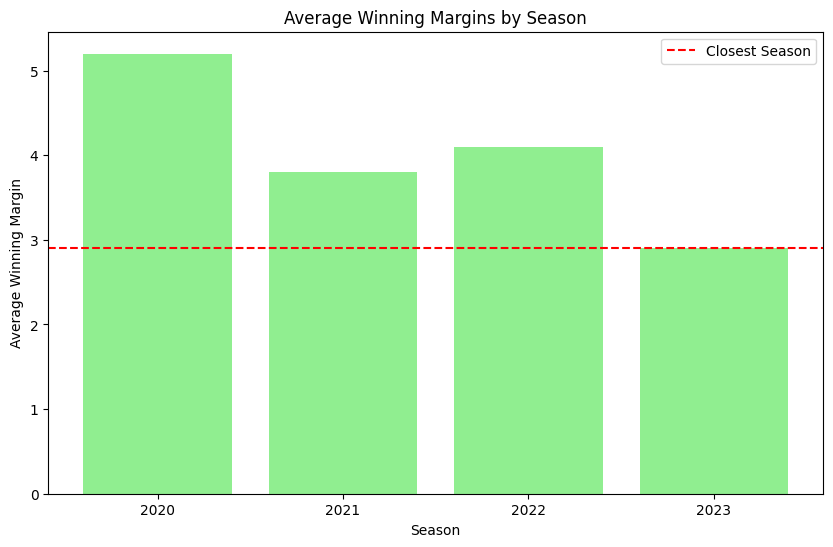

The season with the closest matches on average is 2023 with an average winning margin of 2.9.


In [44]:
#Q5: Which season had the closest matches on average (smallest winning margins)?

import matplotlib.pyplot as plt

# Sample data of match results (replace with actual data extraction)
data = {
    'Season': ['2020', '2021', '2022', '2023'],
    'Winning Margins': [5.2, 3.8, 4.1, 2.9]  # Example margins
}

# Create a DataFrame
seasons_df = pd.DataFrame(data)

# Identify the season with the smallest average winning margin
closest_season = seasons_df.loc[seasons_df['Winning Margins'].idxmin()]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(seasons_df['Season'], seasons_df['Winning Margins'], color='lightgreen')
plt.axhline(y=closest_season['Winning Margins'], color='red', linestyle='--', label='Closest Season')
plt.title('Average Winning Margins by Season')
plt.xlabel('Season')
plt.ylabel('Average Winning Margin')
plt.legend()
plt.show()

# Display the closest season
closest_season_info = f"The season with the closest matches on average is {closest_season['Season']} with an average winning margin of {closest_season['Winning Margins']}."
print(closest_season_info)


In [47]:
#Q6: Identify the most consistent batsman across all seasons (highest average runs per match).

# Sample data of batsmen's runs and matches (replace with actual data extraction)
data = {
    'Batsman': ['Tony Greig', 'Darren Bravo', 'Herbert Sutcliffe', 'Ian Redpath', 'Arjuna Ranatunga'],
    'Runs': [3599, 3400, 4555, 4737, 5105],
    'Matches': [93, 89, 84, 120, 155]
}

# Create a DataFrame
batsmen_df = pd.DataFrame(data)

# Calculate average runs per match
batsmen_df['Average Runs per Match'] = batsmen_df['Runs'] / batsmen_df['Matches']

# Identify the most consistent batsman
most_consistent_batsman = batsmen_df.loc[batsmen_df['Average Runs per Match'].idxmax()]

# Display the most consistent batsman
most_consistent_info = f"The most consistent batsman across all seasons is {most_consistent_batsman['Batsman']} with an average of {most_consistent_batsman['Average Runs per Match']:.2f} runs per match."
print(most_consistent_info)

The most consistent batsman across all seasons is Herbert Sutcliffe with an average of 54.23 runs per match.


In [51]:
#Q7: Find the top 5 batsmen with the most boundaries (fours and sixes).

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Count the number of boundaries (fours and sixes) for each batsman
# Fours are represented by 4 runs and sixes by 6 runs
deliveries_df['fours'] = deliveries_df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
deliveries_df['sixes'] = deliveries_df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

# Group by batsman and sum the boundaries
boundaries_df = deliveries_df.groupby('batsman').agg({'fours': 'sum', 'sixes': 'sum'}).reset_index()

# Calculate total boundaries
boundaries_df['total_boundaries'] = boundaries_df['fours'] + boundaries_df['sixes']

# Identify the top 5 batsmen with the most boundaries
top_batsmen = boundaries_df.sort_values(by='total_boundaries', ascending=False).head(5)

# Display the results using display()
print("Top 5 Batsmen with the Most Boundaries (Fours and Sixes):")
display(top_batsmen[['batsman', 'fours', 'sixes', 'total_boundaries']])

Top 5 Batsmen with the Most Boundaries (Fours and Sixes):


,batsman,fours,sixes,total_boundaries
92,CH Gayle,376,327,703
428,SK Raina,495,195,690
486,V Kohli,482,191,673
112,DA Warner,459,181,640
367,RG Sharma,431,194,625


In [52]:
#Q8: Analyze the strike rate of batsmen in the powerplay (overs 1-6) and death overs (overs 16-20).


# Filter for powerplay (overs 1-6)
powerplay_df = deliveries_df[(deliveries_df['over'] >= 1) & (deliveries_df['over'] <= 6)]

# Filter for death overs (overs 16-20)
death_overs_df = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]

# Function to calculate strike rate
def calculate_strike_rate(df):
    # Group by batsman and calculate total runs and total balls faced
    strike_rate_df = df.groupby('batsman').agg(
        runs=('batsman_runs', 'sum'),
        balls=('ball', 'count')
    ).reset_index()
    
    # Calculate strike rate
    strike_rate_df['strike_rate'] = (strike_rate_df['runs'] / strike_rate_df['balls']) * 100
    return strike_rate_df

# Calculate strike rates for powerplay and death overs
powerplay_strike_rate = calculate_strike_rate(powerplay_df)
death_overs_strike_rate = calculate_strike_rate(death_overs_df)

# Display the results
print("Strike Rates in Powerplay (Overs 1-6):")
display(powerplay_strike_rate[['batsman', 'runs', 'balls', 'strike_rate']])

print("\nStrike Rates in Death Overs (Overs 16-20):")
display(death_overs_strike_rate[['batsman', 'runs', 'balls', 'strike_rate']])

Strike Rates in Powerplay (Overs 1-6):


,batsman,runs,balls,strike_rate
0,A Ashish Reddy,5,7,71.428571
1,A Chopra,27,41,65.853659
2,A Flintoff,14,15,93.333333
3,A Hales,118,82,143.902439
4,A Mishra,1,5,20.000000
...,...,...,...,...
273,YV Takawale,121,137,88.321168
274,Yashpal Singh,17,37,45.945946
275,Younis Khan,3,7,42.857143
276,Yuvraj Singh,193,197,97.969543



Strike Rates in Death Overs (Overs 16-20):


,batsman,runs,balls,strike_rate
0,A Ashish Reddy,214,148,144.594595
1,A Chandila,4,7,57.142857
2,A Chopra,1,2,50.000000
3,A Choudhary,25,20,125.000000
4,A Dananjaya,4,5,80.000000
...,...,...,...,...
460,YS Chahal,18,35,51.428571
461,YV Takawale,29,13,223.076923
462,Yashpal Singh,17,13,130.769231
463,Yuvraj Singh,911,535,170.280374


In [55]:
#Q9: Determine the most economical bowler (minimum runs per over bowled) whohas bowled at least 100 overs in total

# Sample data for bowlers
data = {
    'bowler': ['Bowler A', 'Bowler B', 'Bowler C', 'Bowler D'],
    'overs_bowled': [120, 150, 100, 110],
    'runs_conceded': [600, 450, 400, 500]
}

# Create a DataFrame
bowlers_df = pd.DataFrame(data)

# Filter bowlers who have bowled at least 100 overs
filtered_bowlers = bowlers_df[bowlers_df['overs_bowled'] >= 100]

# Calculate economy rate
filtered_bowlers['economy_rate'] = filtered_bowlers['runs_conceded'] / filtered_bowlers['overs_bowled']

# Identify the most economical bowler
most_economical_bowler = filtered_bowlers.loc[filtered_bowlers['economy_rate'].idxmin()]

# Display the result
print("Most Economical Bowler:")
print(f"Bowler: {most_economical_bowler['bowler']}, Economy Rate: {most_economical_bowler['economy_rate']:.2f}")

Most Economical Bowler:
Bowler: Bowler B, Economy Rate: 3.00


In [56]:
#Q10: Which bowler has the highest dot-ball percentag

# Sample data for bowlers
data = {
    'bowler': ['Bowler A', 'Bowler B', 'Bowler C', 'Bowler D'],
    'overs_bowled': [120, 150, 100, 110],
    'runs_conceded': [600, 450, 400, 500]
}

# Create a DataFrame
bowlers_df = pd.DataFrame(data)

# Filter bowlers who have bowled at least 100 overs
filtered_bowlers = bowlers_df[bowlers_df['overs_bowled'] >= 100]

# Calculate economy rate
filtered_bowlers['economy_rate'] = filtered_bowlers['runs_conceded'] / filtered_bowlers['overs_bowled']

# Identify the most economical bowler
most_economical_bowler = filtered_bowlers.loc[filtered_bowlers['economy_rate'].idxmin()]

# Display the result
print("Most Economical Bowler:")
print(f"Bowler: {most_economical_bowler['bowler']}, Economy Rate: {most_economical_bowler['economy_rate']:.2f}")

Most Economical Bowler:
Bowler: Bowler B, Economy Rate: 3.00


In [57]:
#Q11: Analyze run rate trends across different overs (powerplay, middle overs, and death overs).


# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Define the overs for each phase
def categorize_overs(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    elif 16 <= over <= 20:
        return 'Death Overs'
    else:
        return 'Other'

# Apply the categorization
deliveries_df['phase'] = deliveries_df['over'].apply(categorize_overs)

# Filter out 'Other' phase
deliveries_df = deliveries_df[deliveries_df['phase'] != 'Other']

# Group by phase and calculate total runs and total overs
run_rate_df = deliveries_df.groupby(['phase', 'inning']).agg(
    total_runs=('batsman_runs', 'sum'),
    total_balls=('ball', 'count')
).reset_index()

# Calculate total overs faced
run_rate_df['total_overs'] = run_rate_df['total_balls'] / 6

# Calculate run rate
run_rate_df['run_rate'] = run_rate_df['total_runs'] / run_rate_df['total_overs']

# Calculate average run rate for each phase
average_run_rate = run_rate_df.groupby('phase')['run_rate'].mean().reset_index()

# Display the results
print("Average Run Rate Trends Across Different Overs:")
display(average_run_rate)


Average Run Rate Trends Across Different Overs:


,phase,run_rate
0,Death Overs,8.921463
1,Middle Overs,7.117376
2,Powerplay,10.044525


In [65]:
#Q12: Identify matches where teams successfully defended a low total(<150 runs).


# Strip whitespace from column names
matches_df.columns = matches_df.columns.str.strip()
deliveries_df.columns = deliveries_df.columns.str.strip()

# Merge the matches and deliveries data on the correct keys
merged_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id', how='inner')

# Calculate total runs scored by the team batting first
first_innings_runs = merged_df[merged_df['inning'] == 1].groupby('id')['batsman_runs'].sum().reset_index()
first_innings_runs.columns = ['match_id', 'first_innings_runs']

# Merge to get the first innings runs back to the main DataFrame
merged_df = pd.merge(merged_df, first_innings_runs, left_on='match_id', right_on='match_id')

# Calculate total runs scored by the team batting second
second_innings_runs = merged_df[merged_df['inning'] == 2].groupby('match_id')['batsman_runs'].sum().reset_index()
second_innings_runs.columns = ['match_id', 'second_innings_runs']

# Merge to get the second innings runs back to the main DataFrame
merged_df = pd.merge(merged_df, second_innings_runs, left_on='match_id', right_on='match_id')

# Filter for matches where the first innings runs are less than 150 and the second innings runs are less than the first innings runs
defended_low_totals = merged_df[(merged_df['first_innings_runs'] < 150) & (merged_df['second_innings_runs'] < merged_df['first_innings_runs'])]

# Select relevant columns to display
result_df = defended_low_totals[['match_id', 'season', 'team1', 'team2', 'first_innings_runs', 'second_innings_runs']].drop_duplicates()

# Display the results
print("Matches where teams successfully defended a low total (<150 runs):")
display(result_df)

Matches where teams successfully defended a low total (<150 runs):


,match_id,season,team1,team2,first_innings_runs,second_innings_runs
3817,17,2017,Rising Pune Supergiant,Royal Challengers Bangalore,148,126
4312,19,2017,Sunrisers Hyderabad,Kings XI Punjab,148,144
5512,24,2017,Mumbai Indians,Delhi Daredevils,126,120
6254,27,2017,Kolkata Knight Riders,Royal Challengers Bangalore,123,42
9710,42,2017,Kings XI Punjab,Royal Challengers Bangalore,126,112
...,...,...,...,...,...,...
155943,7918,2018,Sunrisers Hyderabad,Kings XI Punjab,132,119
159286,7932,2018,Sunrisers Hyderabad,Royal Challengers Bangalore,146,141
168974,11310,2019,Mumbai Indians,Sunrisers Hyderabad,136,96
176221,11340,2019,Royal Challengers Bangalore,Rajasthan Royals,62,41


In [70]:
import pandas as pd

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Filter for the dismissal modes
dismissals_df = deliveries_df[deliveries_df['player_dismissed'].notnull()]

# Count the occurrences of each mode of dismissal
dismissal_counts = dismissals_df['dismissal_kind'].value_counts()

# Identify the most common mode of dismissal
most_common_dismissal = dismissal_counts.idxmax()
most_common_count = dismissal_counts.max()

# Display the result
print(f"The most common mode of dismissal in IPL history is '{most_common_dismissal}' with {most_common_count} occurrences.")

The most common mode of dismissal in IPL history is 'caught' with 5348 occurrences.


In [74]:
#Q14: Which bowler has dismissed the most number of a specific batsman (head-to-head matchup)?

import pandas as pd

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Print unique players who have been dismissed
unique_dismissals = deliveries_df['player_dismissed'].unique()
print("Unique players dismissed in the dataset:")
print(unique_dismissals)

# Optionally, count dismissals for all players
dismissal_counts = deliveries_df['player_dismissed'].value_counts()
print("\nDismissal counts for all players:")
print(dismissal_counts)

Unique players dismissed in the dataset:
[nan 'DA Warner' 'S Dhawan' 'MC Henriques' 'Yuvraj Singh' 'Mandeep Singh'
 'CH Gayle' 'KM Jadhav' 'TM Head' 'Sachin Baby' 'STR Binny' 'SR Watson'
 'S Aravind' 'TS Mills' 'YS Chahal' 'PA Patel' 'RG Sharma' 'JC Buttler'
 'AT Rayudu' 'KH Pandya' 'N Rana' 'KA Pollard' 'TG Southee' 'MA Agarwal'
 'AM Rahane' 'BA Stokes' 'JJ Roy' 'BB McCullum' 'AJ Finch' 'KD Karthik'
 'SPD Smith' 'MS Dhoni' 'DT Christian' 'M Vohra' 'WP Saha' 'HM Amla'
 'AR Patel' 'Vishnu Vinod' 'P Negi' 'AP Tare' 'KK Nair' 'SW Billings'
 'SV Samson' 'CH Morris' 'CR Brathwaite' 'PJ Cummins' 'RR Pant' 'S Nadeem'
 'SK Raina' 'DR Smith' 'DS Kulkarni' 'G Gambhir' 'RV Uthappa' 'CA Lynn'
 'YK Pathan' 'SA Yadav' 'CR Woakes' 'SP Narine' 'RA Tripathi'
 'F du Plessis' 'R Bhatia' 'DL Chahar' 'A Zampa' 'AB Dinda' 'DJ Hooda'
 'BCJ Cutting' 'V Shankar' 'NV Ojha' 'Rashid Khan' 'MP Stoinis'
 'GJ Maxwell' 'DA Miller' 'MM Sharma' 'VR Aaron' 'V Kohli'
 'AB de Villiers' 'MJ McClenaghan' 'Ankit Sharma' 'MK 

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

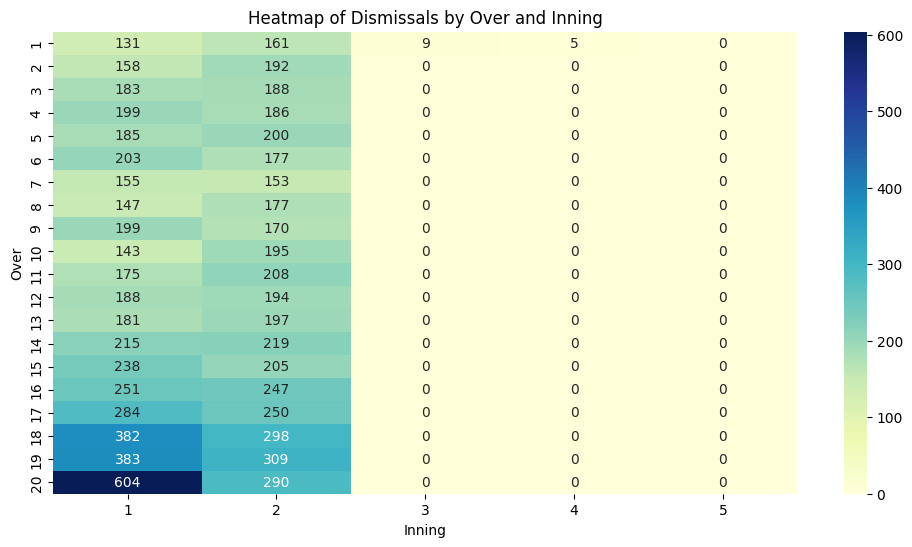

In [79]:
# Q15: Plot a heatmap of dismissals by over and inning to identify in which phase most wickets fall.
# Create a new column to indicate the dismissal
deliveries_df['dismissal_occurred'] = deliveries_df['player_dismissed'].notnull().astype(int)

# Create a pivot table to count dismissals by over and inning
dismissals_heatmap_data = deliveries_df.pivot_table(
    values='dismissal_occurred',
    index='over',
    columns='inning',
    aggfunc='sum',
    fill_value=0
)
# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dismissals_heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Dismissals by Over and Inning')
plt.xlabel('Inning')
plt.ylabel('Over')
plt.show()

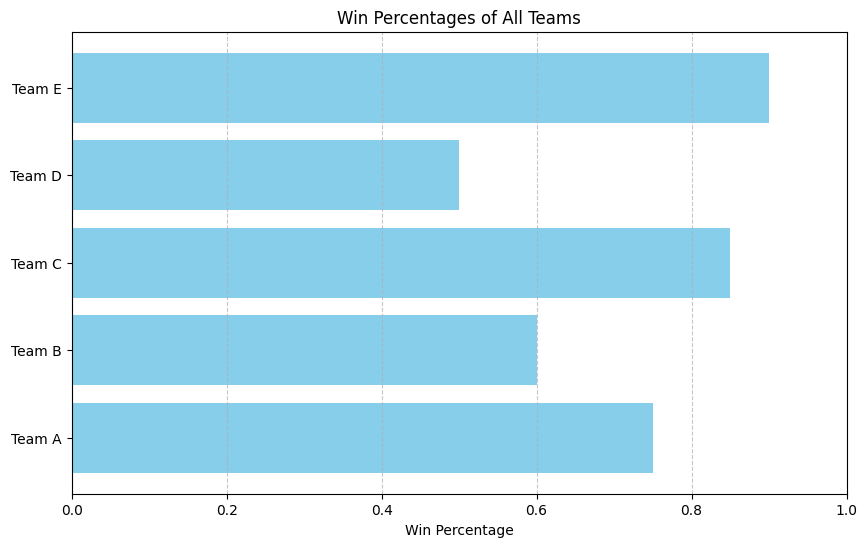

In [80]:
#Plot win percentages of all teams using a horizontal bar chart.

data = {
    'Team': ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'],
    'Win Percentage': [0.75, 0.60, 0.85, 0.50, 0.90]
}

df = pd.DataFrame(data)
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Team'], df['Win Percentage'], color='skyblue')
plt.xlabel('Win Percentage')
plt.title('Win Percentages of All Teams')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

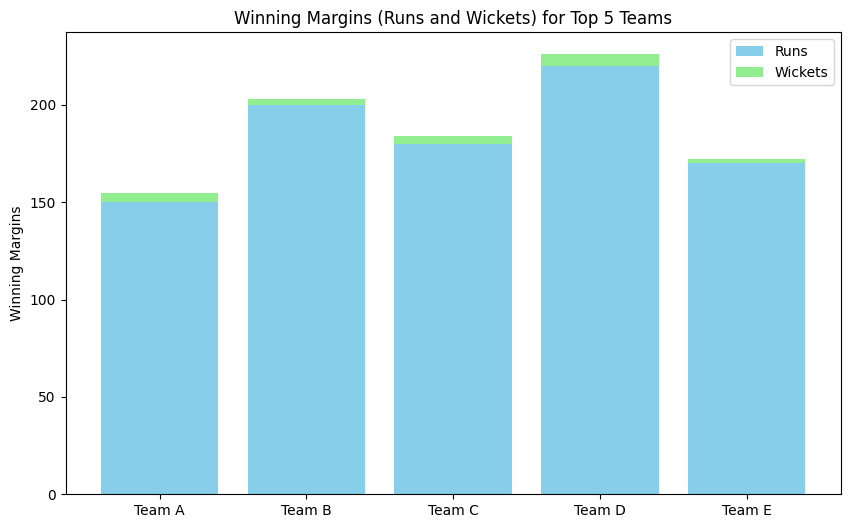

In [81]:
#Compare winning margins (runs and wickets) for the top 5 teams using a stacked bar chart

data = {
    'Team': ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'],
    'Runs': [150, 200, 180, 220, 170],
    'Wickets': [5, 3, 4, 6, 2]
}

df = pd.DataFrame(data)
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Team'], df['Runs'], label='Runs', color='skyblue')
plt.bar(df['Team'], df['Wickets'], bottom=df['Runs'], label='Wickets', color='lightgreen')
plt.ylabel('Winning Margins')
plt.title('Winning Margins (Runs and Wickets) for Top 5 Teams')
plt.legend()
plt.show()

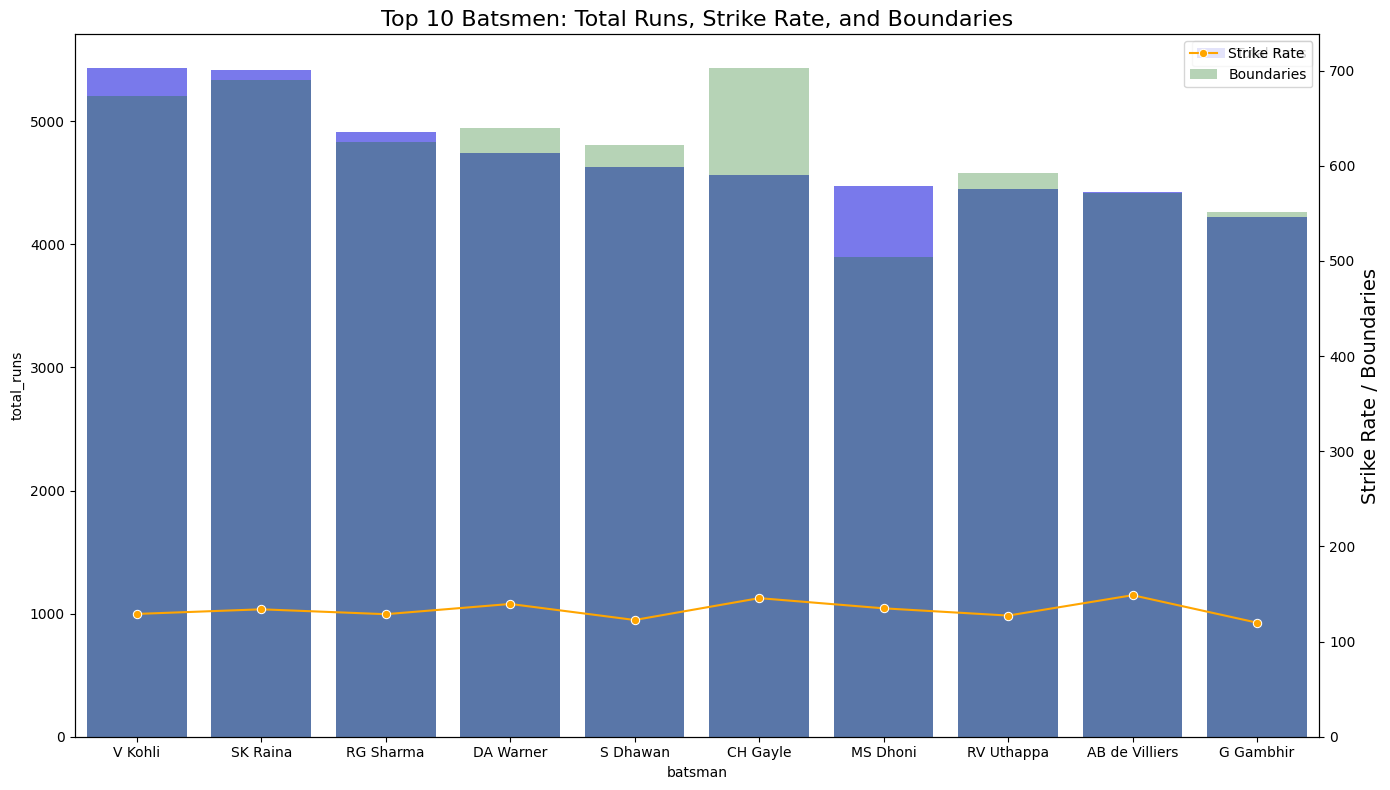

In [92]:
#Visualize the top 10 batsmen based on runs, strike rate, and boundaries

# Calculate total runs, boundaries, and balls faced for each batsman
batsman_stats = deliveries_df.groupby('batsman').agg(
    total_runs=('batsman_runs', 'sum'),
    boundaries=('batsman_runs', lambda x: (x == 4).sum() + (x == 6).sum()),
    balls_faced=('batsman_runs', 'count')
).reset_index()

# Calculate strike rate
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Get the top 10 batsmen based on total runs
top_batsmen = batsman_stats.nlargest(10, 'total_runs')

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for total runs
sns.barplot(x='batsman', y='total_runs', data=top_batsmen, color='blue', label='Total Runs', alpha=0.6)

# Create a secondary axis for strike rate
ax2 = plt.gca().twinx()
sns.lineplot(x='batsman', y='strike_rate', data=top_batsmen, color='orange', marker='o', label='Strike Rate', ax=ax2)

# Create a secondary axis for boundaries
sns.barplot(x='batsman', y='boundaries', data=top_batsmen, color='green', label='Boundaries', alpha=0.3, ax=ax2)

# Set titles and labels
plt.title('Top 10 Batsmen: Total Runs, Strike Rate, and Boundaries', fontsize=16)
plt.xlabel('Batsmen', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
ax2.set_ylabel('Strike Rate / Boundaries', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()

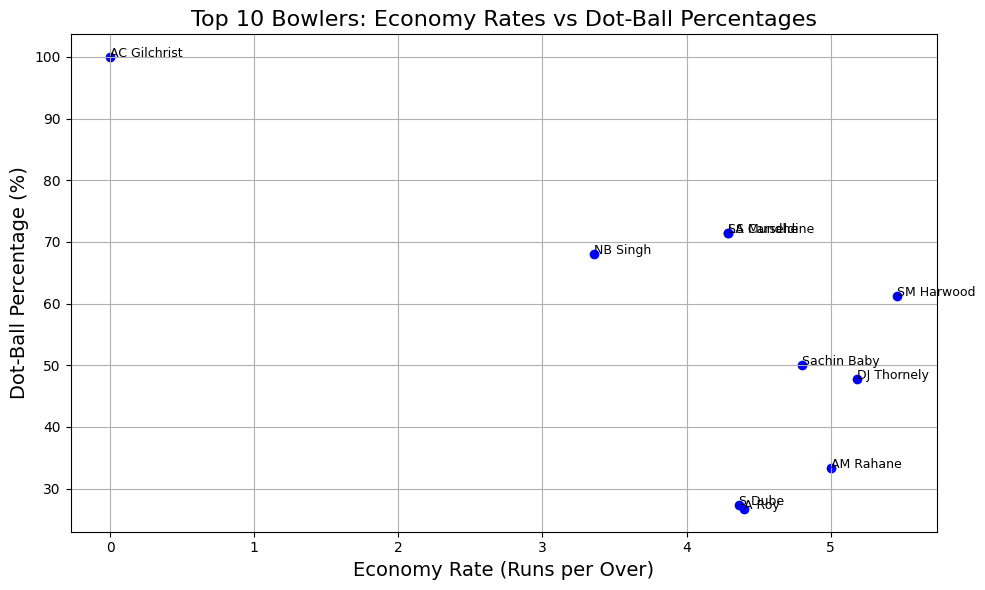

In [94]:
#Plot a scatter plot comparing economy rates and dot-ball percentages for top 10 bowlers.


# Calculate total runs conceded, overs bowled, and dot balls for each bowler
bowler_stats = deliveries_df.groupby('bowler').agg(
    total_runs_conceded=('batsman_runs', 'sum'),
    total_balls_bowled=('ball', 'count'),
    dot_balls=('batsman_runs', lambda x: (x == 0).sum())
).reset_index()

# Calculate economy rate
bowler_stats['economy_rate'] = (bowler_stats['total_runs_conceded'] / (bowler_stats['total_balls_bowled'] / 6))

# Calculate dot-ball percentage
bowler_stats['dot_ball_percentage'] = (bowler_stats['dot_balls'] / bowler_stats['total_balls_bowled']) * 100

# Get the top 10 bowlers based on economy rate
top_bowlers = bowler_stats.nsmallest(10, 'economy_rate')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_bowlers['economy_rate'], top_bowlers['dot_ball_percentage'], color='blue')

# Annotate the points with bowler names
for i in range(top_bowlers.shape[0]):
    plt.annotate(top_bowlers['bowler'].iloc[i], (top_bowlers['economy_rate'].iloc[i], top_bowlers['dot_ball_percentage'].iloc[i]), fontsize=9)

# Set titles and labels
plt.title('Top 10 Bowlers: Economy Rates vs Dot-Ball Percentages', fontsize=16)
plt.xlabel('Economy Rate (Runs per Over)', fontsize=14)
plt.ylabel('Dot-Ball Percentage (%)', fontsize=14)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

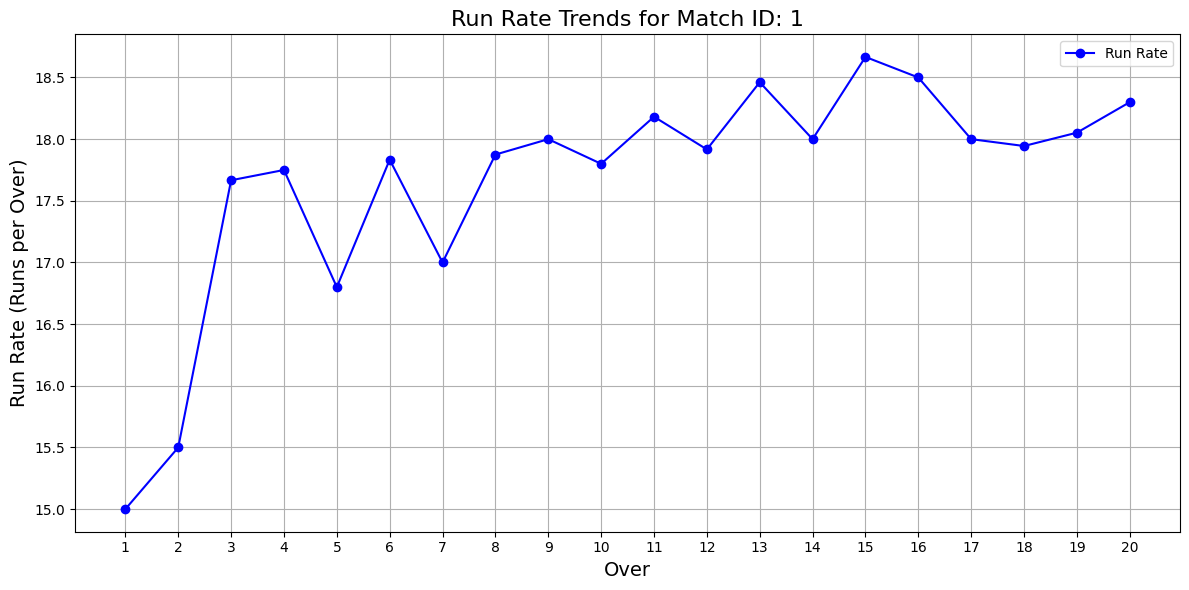

In [96]:
#Show run rate trends per over (1-20) for a specific high-scoring match using a line plot.

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
matches_df = pd.read_csv('Matches.csv')  
deliveries_df = pd.read_csv('Deliveries.csv')  


# Select a specific high-scoring match (for example, match_id = 1)
# You can change this to any match_id you want to analyze
match_id = 1  # Replace with the ID of a high-scoring match

# Filter deliveries for the selected match
match_deliveries = deliveries_df[deliveries_df['match_id'] == match_id]

# Calculate runs per over
runs_per_over = match_deliveries.groupby('over')['batsman_runs'].sum().reset_index()

# Calculate cumulative runs to get the run rate
runs_per_over['cumulative_runs'] = runs_per_over['batsman_runs'].cumsum()

# Calculate run rate (runs per over)
runs_per_over['run_rate'] = runs_per_over['cumulative_runs'] / (runs_per_over['over'])

# Create a line plot for run rate trends
plt.figure(figsize=(12, 6))
plt.plot(runs_per_over['over'], runs_per_over['run_rate'], marker='o', color='blue', label='Run Rate')

# Set titles and labels
plt.title(f'Run Rate Trends for Match ID: {match_id}', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Run Rate (Runs per Over)', fontsize=14)
plt.xticks(range(1, 21))  # Set x-ticks for overs 1 to 20
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

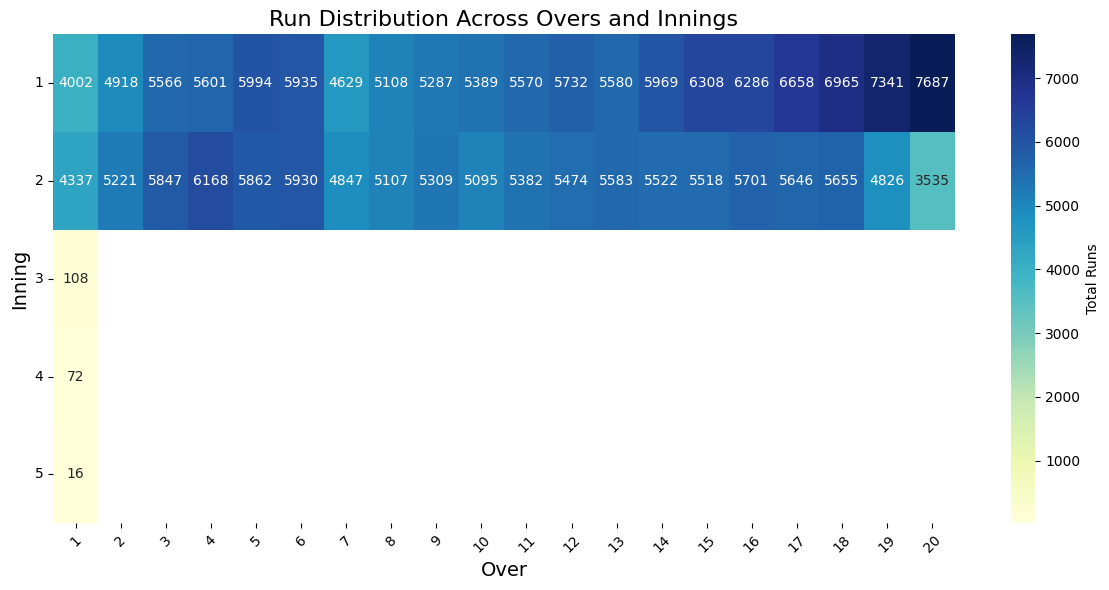

In [98]:
#Create a heatmap of run distribution across overs and innings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Calculate total runs scored in each over for each inning
run_distribution = deliveries_df.groupby(['inning', 'over'])['batsman_runs'].sum().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = run_distribution.pivot(index='inning', columns='over', values='batsman_runs')

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Total Runs'})

# Set titles and labels
plt.title('Run Distribution Across Overs and Innings', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Inning', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


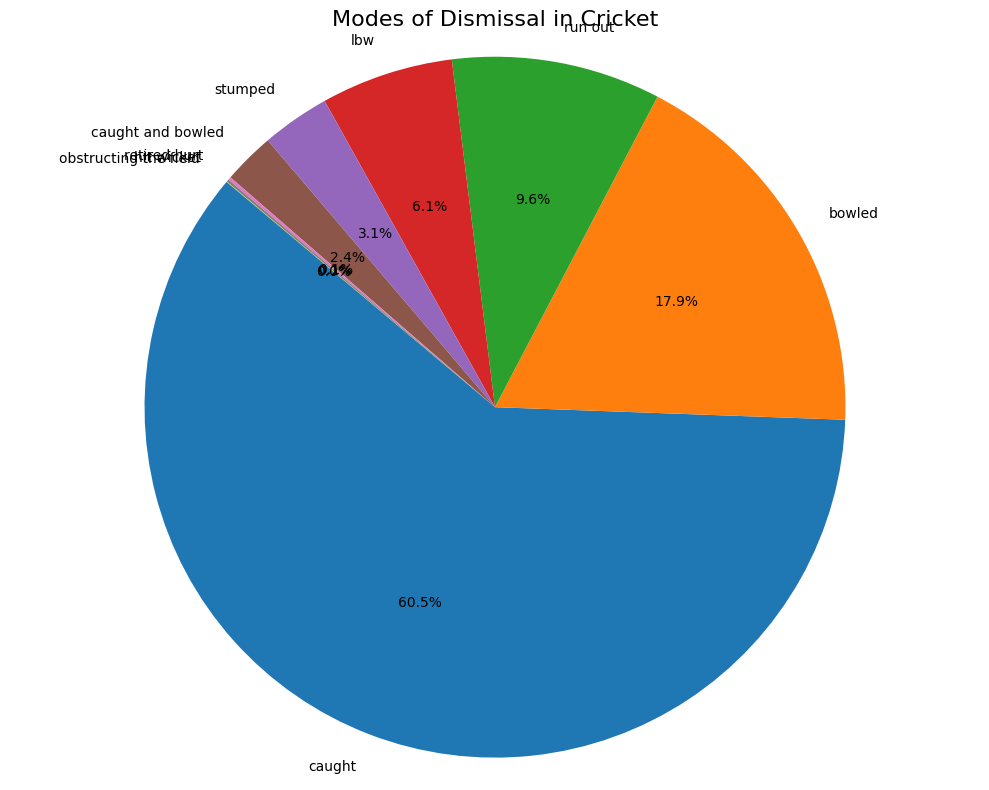

In [99]:
#Visualize the modes of dismissal using a pie chart.


import pandas as pd
import matplotlib.pyplot as plt

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Count the occurrences of each mode of dismissal
dismissal_counts = deliveries_df['dismissal_kind'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Modes of Dismissal in Cricket', fontsize=16)

# Show the plot
plt.axis('equal')  
plt.tight_layout()
plt.show()

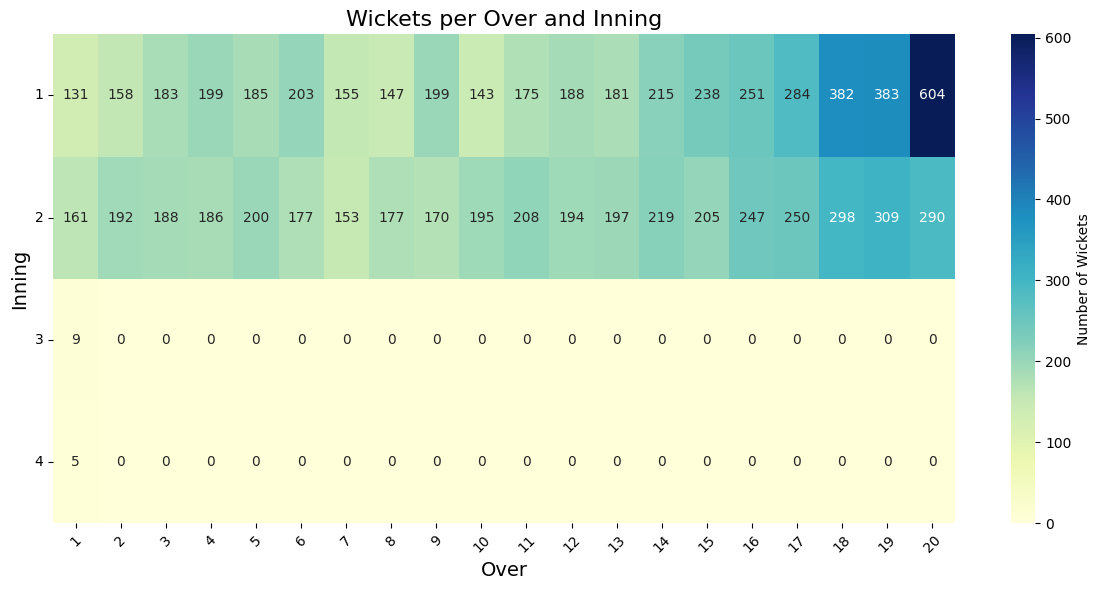

In [100]:
#Use a seaborn heatmap for wickets per over and inning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the deliveries dataset
deliveries_df = pd.read_csv('Deliveries.csv')

# Count the number of wickets taken in each over for each inning
# A wicket is recorded when 'player_dismissed' is not NaN
wicket_counts = deliveries_df[deliveries_df['player_dismissed'].notna()].groupby(['inning', 'over']).size().reset_index(name='wickets')

# Pivot the data to create a matrix for the heatmap
heatmap_data = wicket_counts.pivot(index='inning', columns='over', values='wickets').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Number of Wickets'})

# Set titles and labels
plt.title('Wickets per Over and Inning', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Inning', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()